# Trajectory

## 1. Trajectory Planning

In [1]:
import numpy as np
from numpy import sin, cos, multiply, transpose, cross, dot
from sympy.physics.vector import dynamicsymbols
from sympy import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

PI = pi

d_1 = 30
a_1 = 30
d_2 = 5
a_2 = 30

theta_1 = dynamicsymbols('theta_1')
theta_2 = dynamicsymbols('theta_2')
d_3 = dynamicsymbols('d_3')
theta_4 = dynamicsymbols('theta_4')

x_0, y_0, z_0, theta_t0 = 30, 0, 0, 90
x_1, y_1, z_1, theta_t1 = 30, 0 ,5, 90
x_2, y_2, z_2, theta_t2 = 20, 30, 20, 30
x_3, y_3, z_3, theta_t3 = 0, 50, 10, 0
x_4, y_4, z_4, theta_t4 = 0, 50, 0, 0

timeSeries = [0, 2, 7, 12, 15]
xEndEffector = [x_0, x_1, x_2, x_3, x_4]
yEndEffector = [y_0, y_1, y_2, y_3, y_4]
zEndEffector = [z_0, z_1, z_2, z_3, z_4]
tEndEffector = [theta_t0, theta_t1, theta_t2, theta_t3,  theta_t4]

In [2]:
def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))


### Plot Origin Trajectory

<IPython.core.display.Javascript object>


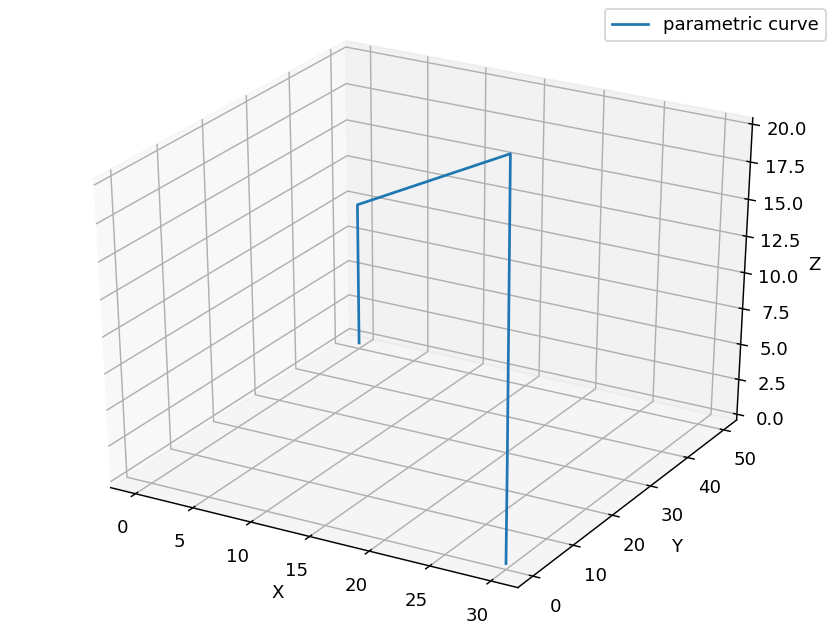

In [3]:
mpl.rcParams['legend.fontsize'] = 10
NUM = 50
scale = 1.1
LEN = range(4)
fig = plt.figure()
cid = fig.canvas.mpl_connect('button_press_event', onclick)
ax = Axes3D(fig)

xOriginTraj = np.array([np.linspace(xEndEffector[i], xEndEffector[i+1], NUM) for i in LEN]).flatten()
yOriginTraj = np.array([np.linspace(yEndEffector[i], yEndEffector[i+1], NUM) for i in LEN]).flatten()
zOriginTraj = np.array([np.linspace(zEndEffector[i], zEndEffector[i+1], NUM) for i in LEN]).flatten()

ax.plot(xOriginTraj, yOriginTraj, zOriginTraj, label='parametric curve')
ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')
ax.legend()

###  Step 1. Modified Time Series

In [4]:
timeSpan = [0.5, 0.5, 0.5, 0.5, 0.5]
timeSeries[0] = timeSeries[0] + 0.5*timeSpan[0] 
timeSeries[-1] = timeSeries[-1] - 0.5*timeSpan[-1] 

### Step 2. Get vel and Acc

In [5]:
initVel , finalVel = [0], [0]
vel_x = initVel + (np.diff(xEndEffector)/np.diff(timeSeries)).tolist() + finalVel
vel_y = initVel + (np.diff(yEndEffector)/np.diff(timeSeries)).tolist() + finalVel
vel_z = initVel + (np.diff(zEndEffector)/np.diff(timeSeries)).tolist() + finalVel
vel_e = initVel + (np.diff(tEndEffector)/np.diff(timeSeries)).tolist() + finalVel

In [6]:
acc_x = np.diff(vel_x) / timeSpan
acc_y = np.diff(vel_y) / timeSpan
acc_z = np.diff(vel_z) / timeSpan
acc_e = np.diff(vel_e) / timeSpan

In [7]:
det = np.diff(timeSeries)
t12 = det[0] - 0.5*timeSpan[0] - 0.5*timeSpan[1]
t23 = det[1] - 0.5*timeSpan[1] - 0.5*timeSpan[2]
t34 = det[2] - 0.5*timeSpan[2] - 0.5*timeSpan[3]
t45 = det[3] - 0.5*timeSpan[3] - 0.5*timeSpan[4]

### Step 3. Start Trajectory

In [8]:
x_traj = np.array([])
y_traj = np.array([])
z_traj = np.array([])
e_traj = np.array([])

t1 = np.arange(0, timeSpan[0], 0.01)
x_traj = np.append(x_traj, xEndEffector[0] + vel_x[0]*t1 + 0.5*acc_x[0]*pow(t1,2))
y_traj = np.append(y_traj, yEndEffector[0] + vel_y[0]*t1 + 0.5*acc_y[0]*pow(t1,2))
z_traj = np.append(z_traj, zEndEffector[0] + vel_z[0]*t1 + 0.5*acc_z[0]*pow(t1,2))
e_traj = np.append(e_traj, tEndEffector[0] + vel_e[0]*t1 + 0.5*acc_e[0]*pow(t1,2))

t2 = np.arange(0, t12, 0.01)
x_traj = np.append(x_traj, x_traj[-1] + vel_x[1]*t2)
y_traj = np.append(y_traj, y_traj[-1] + vel_y[1]*t2)
z_traj = np.append(z_traj, z_traj[-1] + vel_z[1]*t2)
e_traj = np.append(e_traj, e_traj[-1] + vel_e[1]*t2)

t3 = np.arange(0, timeSpan[1], 0.01)
x_traj = np.append(x_traj, x_traj[-1] + vel_x[1]*t3 + 0.5*acc_x[1]*pow(t3,2))
y_traj = np.append(y_traj, y_traj[-1] + vel_y[1]*t3 + 0.5*acc_y[1]*pow(t3,2))
z_traj = np.append(z_traj, z_traj[-1] + vel_z[1]*t3 + 0.5*acc_z[1]*pow(t3,2))
e_traj = np.append(e_traj, e_traj[-1] + vel_e[1]*t3 + 0.5*acc_e[1]*pow(t3,2))

t4 = np.arange(0, t23, 0.01)
x_traj = np.append(x_traj, x_traj[-1] + vel_x[2]*t4)
y_traj = np.append(y_traj, y_traj[-1] + vel_y[2]*t4)
z_traj = np.append(z_traj, z_traj[-1] + vel_z[2]*t4)
e_traj = np.append(e_traj, e_traj[-1] + vel_e[2]*t4)

t5 = np.arange(0, timeSpan[2], 0.01)
x_traj = np.append(x_traj, x_traj[-1] + vel_x[2]*t5 + 0.5*acc_x[2]*pow(t5,2))
y_traj = np.append(y_traj, y_traj[-1] + vel_y[2]*t5 + 0.5*acc_y[2]*pow(t5,2))
z_traj = np.append(z_traj, z_traj[-1] + vel_z[2]*t5 + 0.5*acc_z[2]*pow(t5,2))
e_traj = np.append(e_traj, e_traj[-1] + vel_e[2]*t5 + 0.5*acc_e[2]*pow(t5,2))

t6 = np.arange(0, t34, 0.01)
x_traj = np.append(x_traj, x_traj[-1] + vel_x[3]*t6)
y_traj = np.append(y_traj, y_traj[-1] + vel_y[3]*t6)
z_traj = np.append(z_traj, z_traj[-1] + vel_z[3]*t6)
e_traj = np.append(e_traj, e_traj[-1] + vel_e[3]*t6)

t7 = np.arange(0, timeSpan[3], 0.01)
x_traj = np.append(x_traj, x_traj[-1] + vel_x[3]*t7 + 0.5*acc_x[3]*pow(t7,2))
y_traj = np.append(y_traj, y_traj[-1] + vel_y[3]*t7 + 0.5*acc_y[3]*pow(t7,2))
z_traj = np.append(z_traj, z_traj[-1] + vel_z[3]*t7 + 0.5*acc_z[3]*pow(t7,2))
e_traj = np.append(e_traj, e_traj[-1] + vel_e[3]*t7 + 0.5*acc_e[3]*pow(t7,2))

t8 = np.arange(0, t45, 0.01)
x_traj = np.append(x_traj, x_traj[-1] + vel_x[4]*t8)
y_traj = np.append(y_traj, y_traj[-1] + vel_y[4]*t8)
z_traj = np.append(z_traj, z_traj[-1] + vel_z[4]*t8)
e_traj = np.append(e_traj, e_traj[-1] + vel_e[4]*t8)

t9 = np.arange(0, timeSpan[4], 0.01)
x_traj = np.append(x_traj, x_traj[-1] + vel_x[4]*t9 + 0.5*acc_x[4]*pow(t9,2))
y_traj = np.append(y_traj, y_traj[-1] + vel_y[4]*t9 + 0.5*acc_y[4]*pow(t9,2))
z_traj = np.append(z_traj, z_traj[-1] + vel_z[4]*t9 + 0.5*acc_z[4]*pow(t9,2))
e_traj = np.append(e_traj, e_traj[-1] + vel_e[4]*t9 + 0.5*acc_e[4]*pow(t9,2))

### Plot The Comparision

<IPython.core.display.Javascript object>


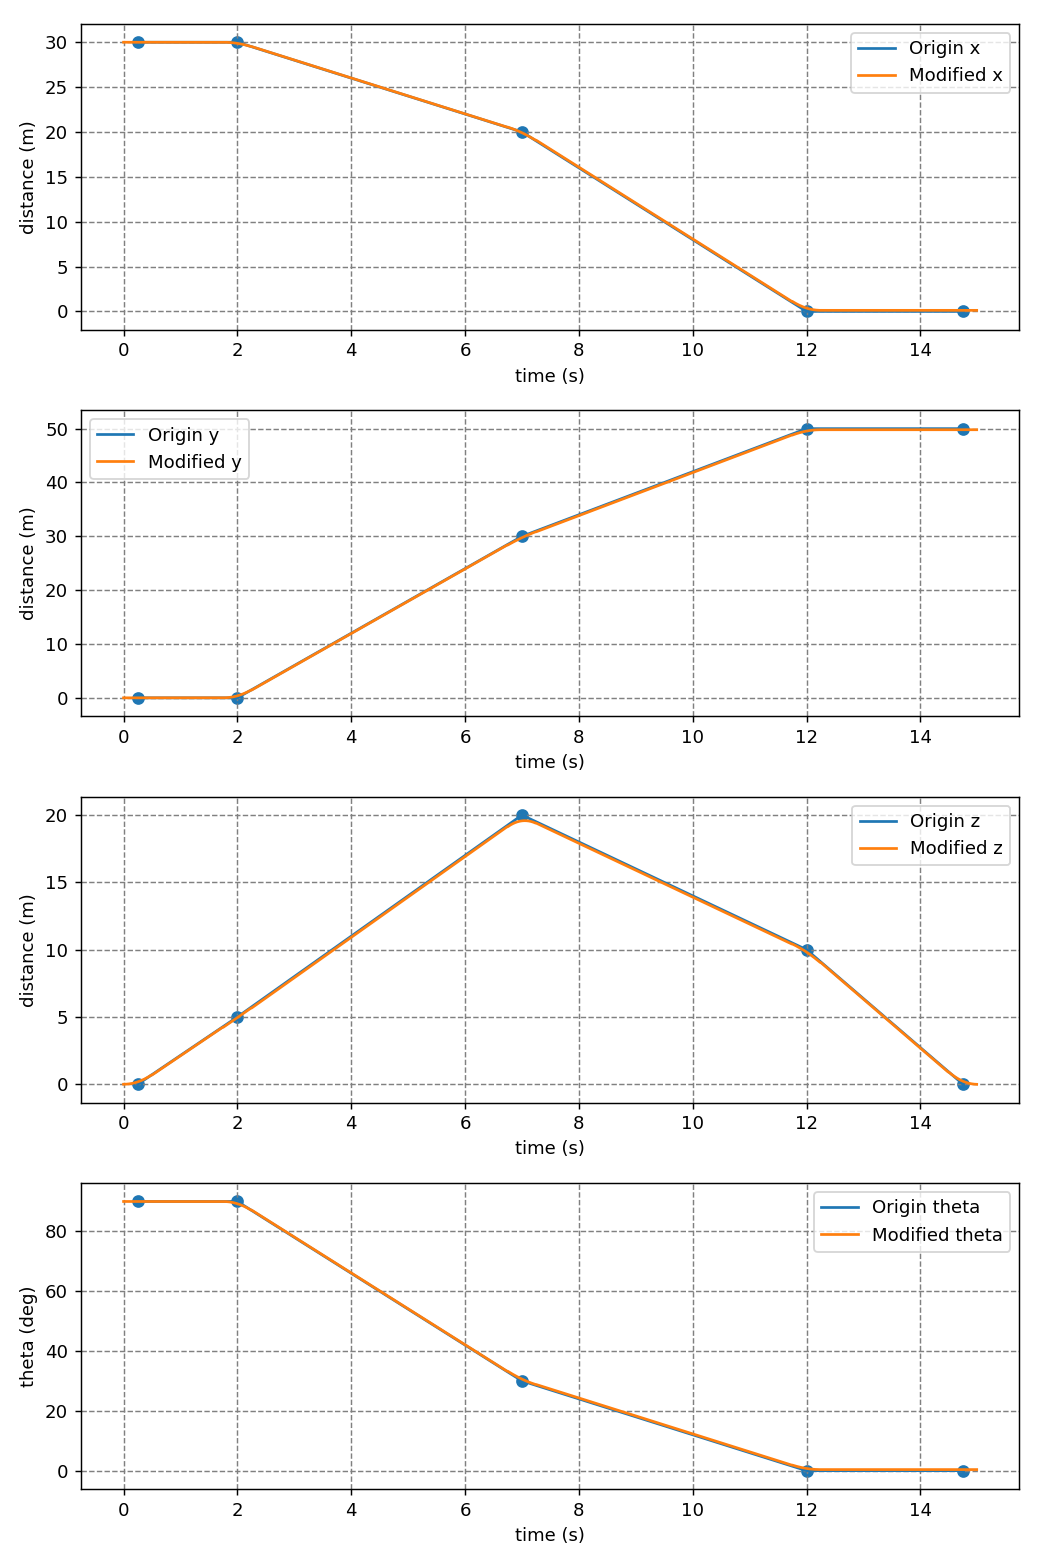

In [9]:
all_t = np.arange(0, 15, 0.01)

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8, 12))

ax[0].plot(timeSeries, xEndEffector, label='Origin x')
ax[0].scatter(timeSeries, xEndEffector)
ax[0].plot(all_t, x_traj, label='Modified x')

ax[1].plot(timeSeries, yEndEffector, label='Origin y')
ax[1].scatter(timeSeries, yEndEffector)
ax[1].plot(all_t, y_traj, label='Modified y')
           
ax[2].plot(timeSeries, zEndEffector, label='Origin z')
ax[2].scatter(timeSeries, zEndEffector)
ax[2].plot(all_t, z_traj, label='Modified z')

ax[3].plot(timeSeries, tEndEffector, label='Origin theta')
ax[3].scatter(timeSeries, tEndEffector)
ax[3].plot(all_t, e_traj, label='Modified theta')

for i in range(4):
    ax[i].grid(color='gray', linestyle='--')
    ax[i].legend(loc='best')
    ax[i].set_xlabel(f'time (s)')
    if i == 3: ax[i].set_ylabel(f'theta (deg)')
    else: ax[i].set_ylabel(f'distance (m)')
        
plt.tight_layout()
plt.show()


### Plot 3D Trajectory

<IPython.core.display.Javascript object>


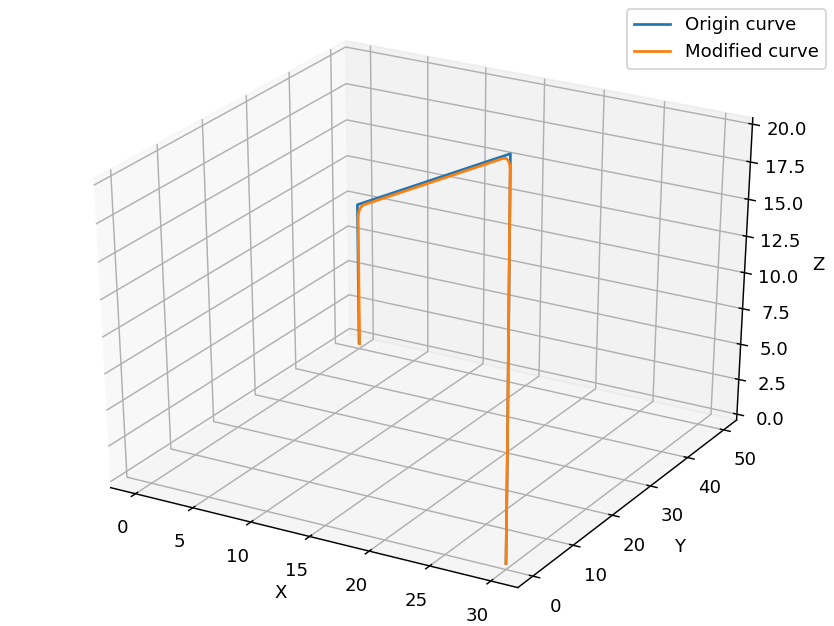

In [10]:
mpl.rcParams['legend.fontsize'] = 10
%matplotlib notebook

fig = plt.figure()
cid = fig.canvas.mpl_connect('button_press_event', onclick)
ax = Axes3D(fig)

xOriginTraj = np.array([np.linspace(xEndEffector[i], xEndEffector[i+1], NUM) for i in LEN]).flatten()
yOriginTraj = np.array([np.linspace(yEndEffector[i], yEndEffector[i+1], NUM) for i in LEN]).flatten()
zOriginTraj = np.array([np.linspace(zEndEffector[i], zEndEffector[i+1], NUM) for i in LEN]).flatten()

ax.plot(xOriginTraj, yOriginTraj, zOriginTraj, label='Origin curve')
ax.plot(x_traj, y_traj, z_traj, label='Modified curve')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

## 2. Cubic Splines

In [11]:
from functools import reduce
from sympy.solvers.solveset import solveset, solveset_real
def transformMatrix(alpha, a, d, theta):
    return np.array([[cos(theta),           -sin(theta), 0 , a],
                    [sin(theta)*cos(alpha),cos(theta)*cos(alpha),-sin(alpha),-sin(alpha)*d],
                    [sin(theta)*sin(alpha),cos(theta)*sin(alpha),cos(alpha), cos(alpha)*d],
                    [0, 0, 0, 1]])

### Plot Origin Theta

In [12]:
T_10 = transformMatrix(0, 0, d_1, theta_1)
T_21 = transformMatrix(0, a_1, d_2, theta_2)
T_32 = transformMatrix(0, a_2, d_3, 0)
T_43 = transformMatrix(0, 0, 0, theta_4)

tfMatrix = np.linalg.multi_dot([T_10, T_21, T_32, T_43]).tolist()
tfMatrix = Matrix(tfMatrix)
t1 = []
t2 = []
d3 = []

for i in range(5):
    x = xEndEffector[i]
    y = yEndEffector[i]
    z = zEndEffector[i]
    
    eq1 = pow(30, 2)*(2 + 2*cos(theta_2)) - (pow(x,2)+pow(y,2))
    t2 += solve(eq1, theta_2)
    
    c2, s2 = cos(t2[i*2+0]), sin(t2[i*2+0])
    eq2 = 30*(cos(theta_1)*c2 - sin(theta_1)*s2)+ 30*cos(theta_1) - x
    t1 += solve(eq2, theta_1)
    
    c2, s2 = cos(t2[i*2+1]), sin(t2[i*2+1])
    eq2 = 30*(cos(theta_1)*c2 - sin(theta_1)*s2)+ 30*cos(theta_1) - x
    t1 += solve(eq2, theta_1)
    
    eq3 = d_3 + 35 - z
    d3 += solve(eq3, d_3)


In [13]:
pointTheta_1 = np.array([60, 60, 109.3737, 123.5573, 123.5573])
pointTheta_2 = np.array([-120, -120, -106.1276, -67.1146, -67.1146])
pointDist_3 = d3
pointTheta_4 = tEndEffector - pointTheta_1 - pointTheta_2

### Plot every Joint only use linear section

<IPython.core.display.Javascript object>


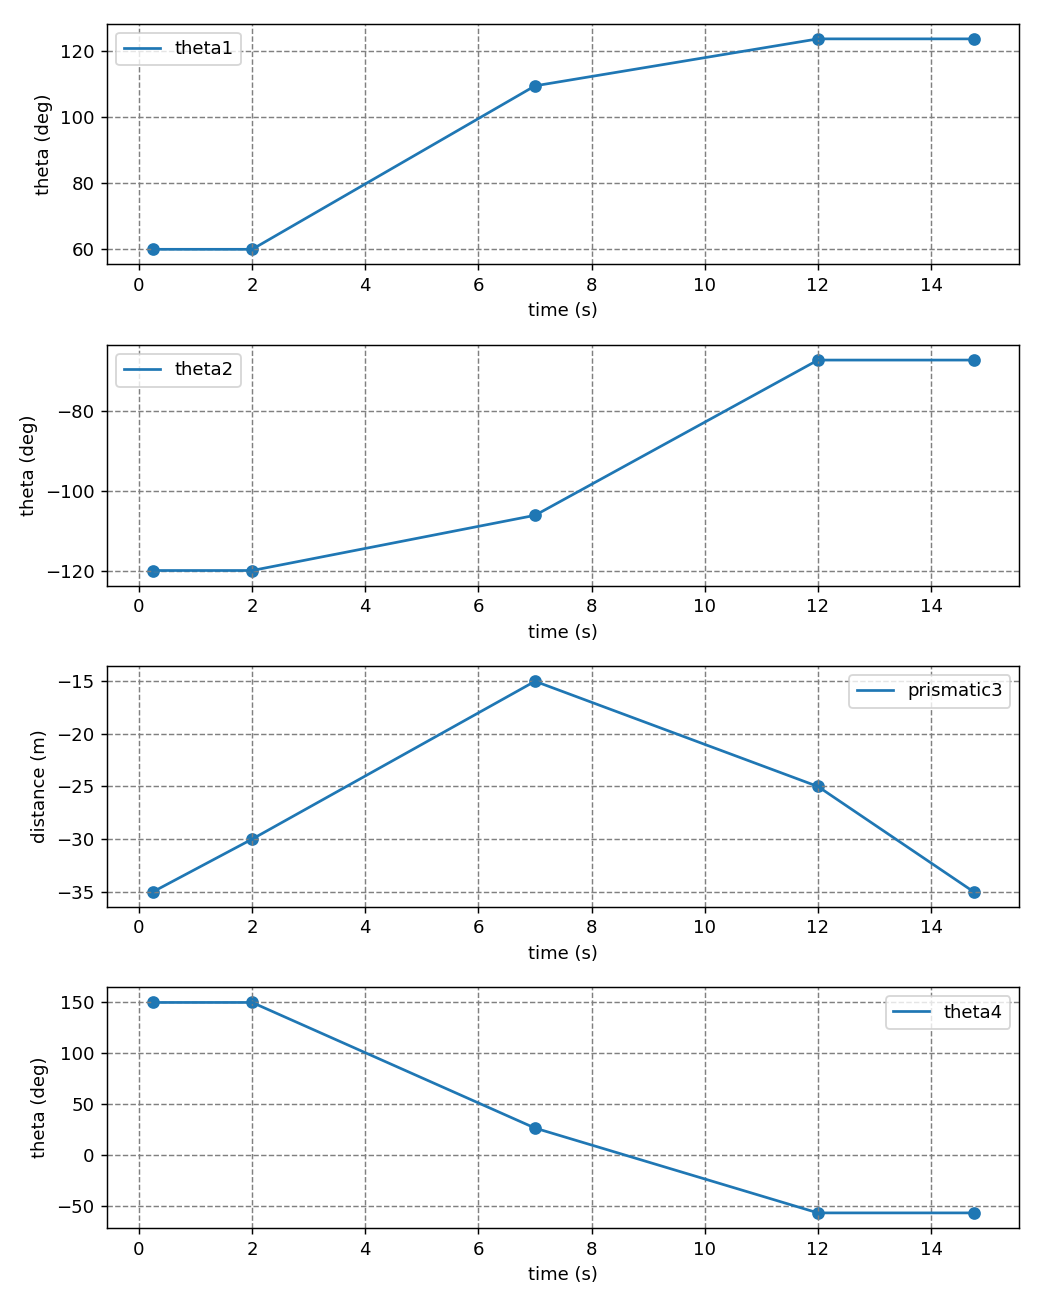

In [18]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8, 10))

ax[0].plot(timeSeries, pointTheta_1, label='theta1')
ax[0].scatter(timeSeries, pointTheta_1)
ax[1].plot(timeSeries, pointTheta_2, label='theta2')
ax[1].scatter(timeSeries, pointTheta_2)
ax[2].plot(timeSeries, pointDist_3, label='prismatic3')
ax[2].scatter(timeSeries, pointDist_3)
ax[3].plot(timeSeries, pointTheta_4, label='theta4')
ax[3].scatter(timeSeries, pointTheta_4)

for i in range(4):
    ax[i].grid(color='gray', linestyle='--')
    ax[i].legend(loc='best')
    ax[i].set_xlabel(f'time (s)')
    if i == 2: ax[i].set_ylabel(f'distance (m)')
    else: ax[i].set_ylabel(f'theta (deg)')
        
plt.tight_layout()
plt.show()

### Get linear velocity and acceleration

#### Boundry Condition

In [19]:
T = lambda t: np.array([[1,        0,        0,        0],
                        [1,        t,    pow(t,2),  pow(t,3)],
                        [0,        1,        0,        0],
                        [0,        1,       2*t,    3*pow(t,2)]])

def getAngVel(theta, t):
    vel = []
    for i in range(len(t)-2):
        index = i+1
        vel += [((theta[index+1]-theta[index])/(t[index+1]-t[index]) + \
                  (theta[index]-theta[index-1])/(t[index]-t[index-1]))/2]
    return [0] + vel + [0]

timeSeries = [0, 2, 7, 12, 15]
vel_1 = getAngVel(pointTheta_1, timeSeries)
vel_2 = getAngVel(pointTheta_2, timeSeries)
vel_3 = getAngVel(pointDist_3, timeSeries)
vel_4 = getAngVel(pointTheta_4, timeSeries)

#### Parameter a

In [24]:
def getParameter(t, theta, vel):
    a = np.array([])
    
    for i in range(len(t)-1):
        x = np.array([theta[i], theta[i+1], vel[i], vel[i+1]]).T
        Ti = np.linalg.inv(T(t[i+1]-t[i]))
        mat = np.dot(Ti, x)
        a = np.append(a, mat, axis=0)
        
    return a.reshape(4, 4)

np.set_printoptions(suppress=True)
polynomial_1 = getParameter(timeSeries, pointTheta_1, vel_1)
polynomial_2 = getParameter(timeSeries, pointTheta_2, vel_2)
polynomial_3 = getParameter(timeSeries, pointDist_3, vel_3)
polynomial_4 = getParameter(timeSeries, pointTheta_4, vel_4)

### Generalize every trajectory

In [17]:
# Section 1 
Traj_1 = np.array([])
Traj_2 = np.array([])
Traj_3 = np.array([])
Traj_4 = np.array([])

get_currTheta = lambda poly, i, curr: poly[i][0]+poly[i][1]*curr+poly[i][2]*pow(curr,2)+\
                                     poly[i][3]*pow(curr,3)

for i in range(len(timeSeries)-1):
    t2 = timeSeries[i+1]
    t1 = timeSeries[i]
    curr_t = np.arange(0, t2-t1, 0.01)
    get_currTheta(polynomial_1, i, curr_t)
    Traj_1 = np.append(Traj_1, get_currTheta(polynomial_1, i, curr_t))
    Traj_2 = np.append(Traj_2, get_currTheta(polynomial_2, i, curr_t))
    Traj_3 = np.append(Traj_3, get_currTheta(polynomial_3, i, curr_t))
    Traj_4 = np.append(Traj_4, get_currTheta(polynomial_4, i, curr_t))

## Plot the Comparision

<IPython.core.display.Javascript object>


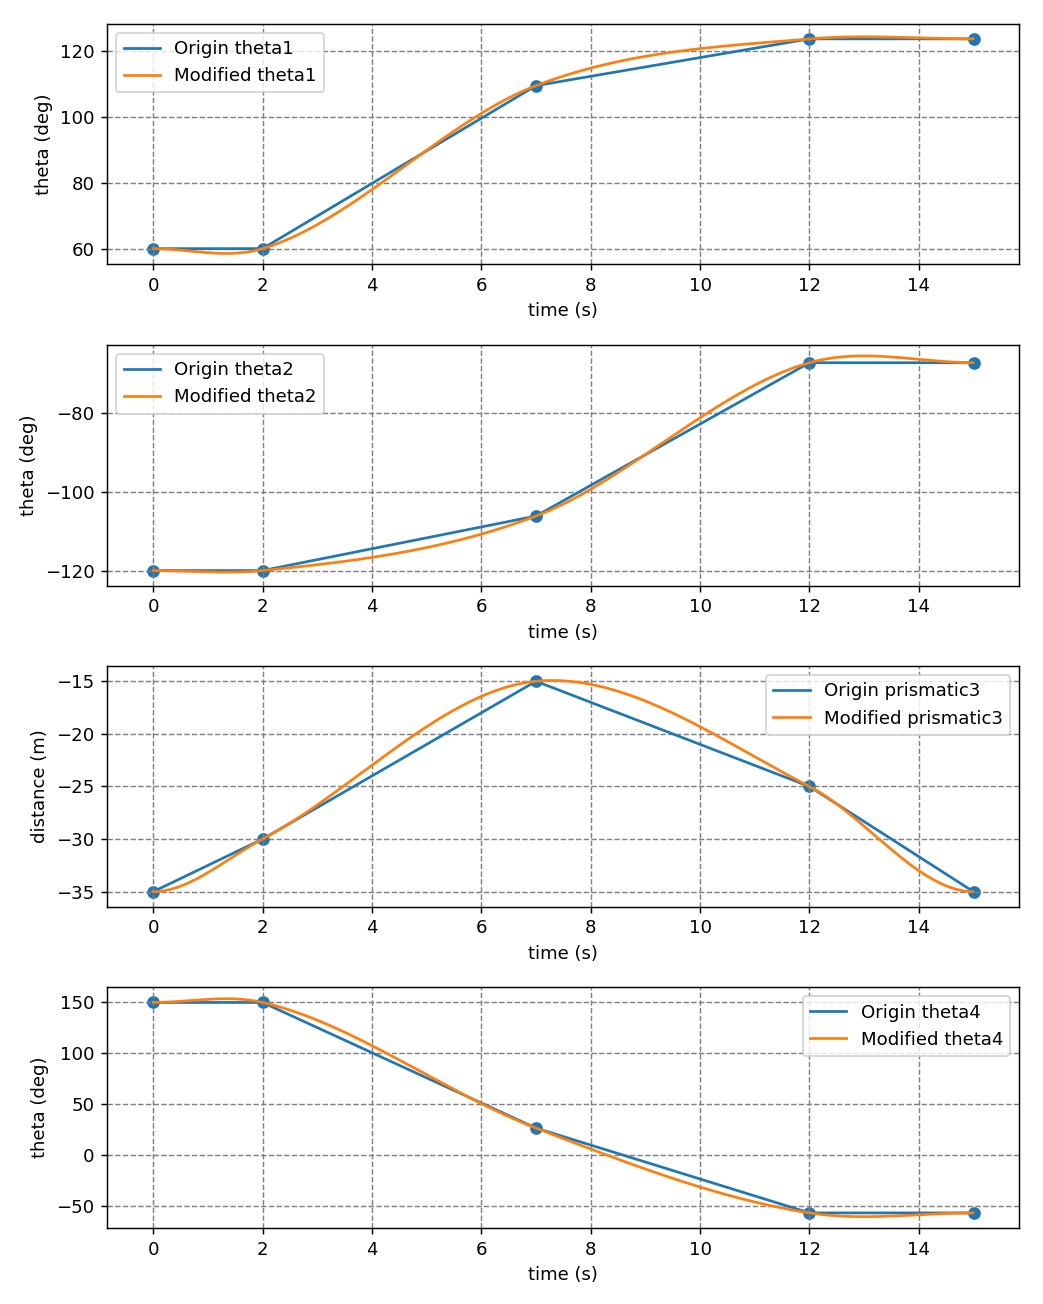

In [18]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8, 10))

all_t = np.arange(0, 15, 0.01)

ax[0].plot(timeSeries, pointTheta_1, label='Origin theta1')
ax[0].scatter(timeSeries, pointTheta_1)
ax[0].plot(all_t, Traj_1, label='Modified theta1')

ax[1].plot(timeSeries, pointTheta_2, label='Origin theta2')
ax[1].scatter(timeSeries, pointTheta_2)
ax[1].plot(all_t, Traj_2, label='Modified theta2')

ax[2].plot(timeSeries, pointDist_3, label='Origin prismatic3')
ax[2].scatter(timeSeries, pointDist_3)
ax[2].plot(all_t, Traj_3, label='Modified prismatic3')

ax[3].plot(timeSeries, pointTheta_4, label='Origin theta4')
ax[3].scatter(timeSeries, pointTheta_4)
ax[3].plot(all_t, Traj_4, label='Modified theta4')

for i in range(4):
    ax[i].grid(color='gray', linestyle='--')
    ax[i].legend(loc='best')
    ax[i].set_xlabel(f'time (s)')
    if i == 2: ax[i].set_ylabel(f'distance (m)')
    else: ax[i].set_ylabel(f'theta (deg)')
        
plt.tight_layout()
plt.show()